In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("loan_approval_data.csv")

In [8]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [9]:
#To get the info
df.info() #This has 1000 entries or rows or samples and 19 features+1 output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [10]:
df.isnull().sum() #This will give the null values present for each column.

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [11]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [12]:
#Handle the missing data
categorical_cols = df.select_dtypes(include = ["object"]).columns
numerical_cols = df.select_dtypes(include = ["number"]).columns

In [13]:
categorical_cols


Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [14]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [15]:
categorical_cols.size + numerical_cols.size

20

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
num_inp = SimpleImputer(strategy = "mean")
df[numerical_cols] = num_inp.fit_transform(df[numerical_cols])

In [18]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [19]:
cal_inp = SimpleImputer(strategy = "most_frequent")
df[categorical_cols] = cal_inp.fit_transform(df[categorical_cols])

In [20]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [21]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

Text(0.5, 1.0, 'Is Loan approved or not?')

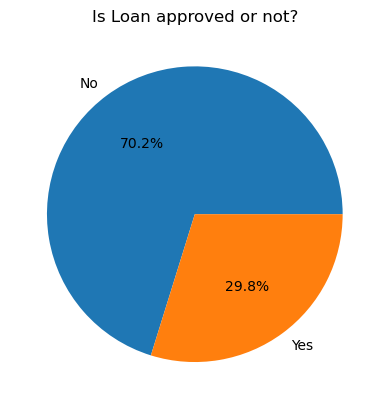

In [22]:
#EDA - Exploratory Data Analysis
#How balanced our classes are?
classes_count = df["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is Loan approved or not?")

[Text(0, 0, '422'),
 Text(0, 0, '202'),
 Text(0, 0, '144'),
 Text(0, 0, '135'),
 Text(0, 0, '97')]

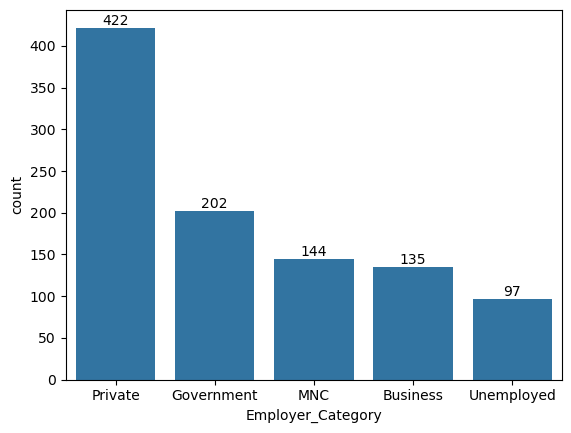

In [23]:
#gender_cnt = df["Gender"].value_counts()
#ax = sns.barplot(gender_cnt)
#ax.bar_label(ax.containers[0])

#edu_cnt = df["Education_Level"].value_counts()
#ax = sns.barplot(edu_cnt)
#ax.bar_label(ax.containers[0])

#marital_cnt = df["Marital_Status"].value_counts()
#ax = sns.barplot(marital_cnt)
#ax.bar_label(ax.containers[0])

#emp_cnt = df["Employment_Status"].value_counts()
#ax = sns.barplot(emp_cnt)
#ax.bar_label(ax.containers[0])


#loan_cnt = df["Loan_Purpose"].value_counts()
#ax = sns.barplot(loan_cnt)
#ax.bar_label(ax.containers[0])

#property_cnt = df["Property_Area"].value_counts()
#ax = sns.barplot(property_cnt)
#ax.bar_label(ax.containers[0])

employe_cnt = df["Employer_Category"].value_counts()
ax = sns.barplot(employe_cnt)
ax.bar_label(ax.containers[0])


<Axes: xlabel='Applicant_Income', ylabel='Count'>

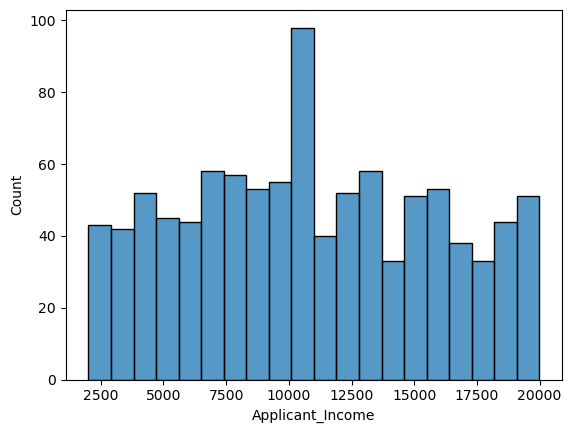

In [24]:
#Analyse income to know which income has more set of data

sns.histplot(data = df,x = "Applicant_Income",bins = 20) #We have more set of people earning at 10000

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

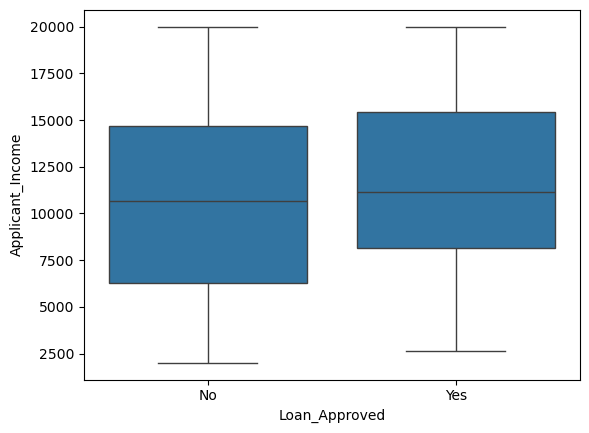

In [25]:
#outliers -boxplots - It will be used to detect outlier --- Here based on income the loan approval is also increased.
sns.boxplot(
    data = df,
    x="Loan_Approved",
    y="Applicant_Income"
)

<Axes: xlabel='Loan_Approved', ylabel='Employer_Category'>

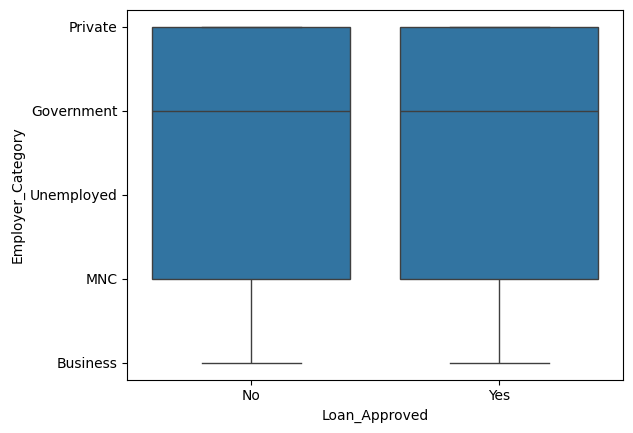

In [26]:
sns.boxplot(
    data = df,
    x="Loan_Approved",
    y="Employer_Category"
)

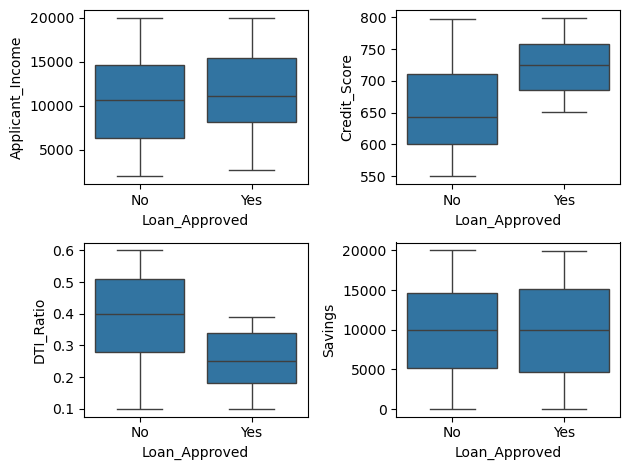

In [49]:
fig,axes = plt.subplots(2,2)
sns.boxplot(ax = axes[0,0],data =df, x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax = axes[0,1],data =df, x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax = axes[1,0],data =df, x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax = axes[1,1],data =df, x="Loan_Approved",y="Savings")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

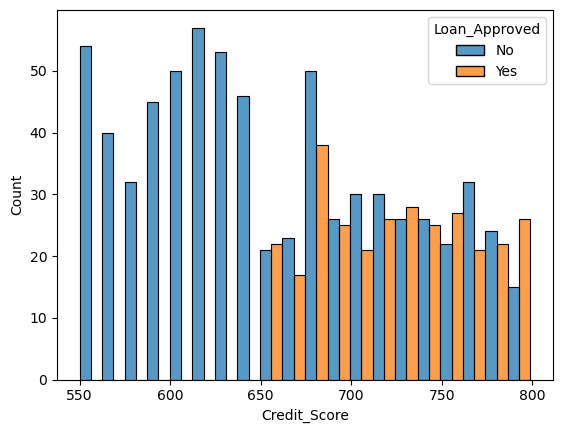

In [27]:
sns.histplot(
    data = df,
    x= "Credit_Score",
    hue= "Loan_Approved",
    bins = 20,
    multiple= "dodge")
#Here the loan is getting approved when the credit score starts from 650 

<Axes: xlabel='Applicant_Income', ylabel='Count'>

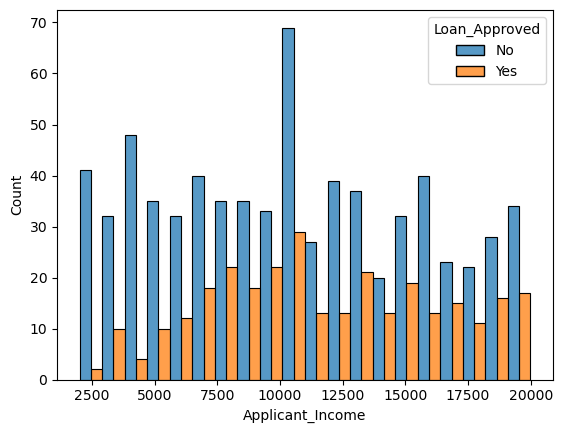

In [51]:
sns.histplot(
    data = df,
    x= "Applicant_Income",
    hue= "Loan_Approved",
    bins = 20,
    multiple= "dodge")

#Here the laon is getting approved when the income is increasing in msot of the cases

In [28]:
#Remove the application_ID since that column will not affect the loan approval
df = df.drop("Applicant_ID",axis =1)

In [29]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])

In [31]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [32]:
cols = ["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]
ohe = OneHotEncoder( drop ="first",sparse_output = False,handle_unknown="ignore")
encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded,columns = ohe.get_feature_names_out(cols), index = df.index)
df = pd.concat([df.drop(columns = cols),encoded_df],axis=1)

In [33]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [34]:
ohe.get_feature_names_out(cols)

array(['Employment_Status_Salaried', 'Employment_Status_Self-employed',
       'Employment_Status_Unemployed', 'Marital_Status_Single',
       'Loan_Purpose_Car', 'Loan_Purpose_Education', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Gender_Male',
       'Employer_Category_Government', 'Employer_Category_MNC',
       'Employer_Category_Private', 'Employer_Category_Unemployed'],
      dtype=object)

<Axes: >

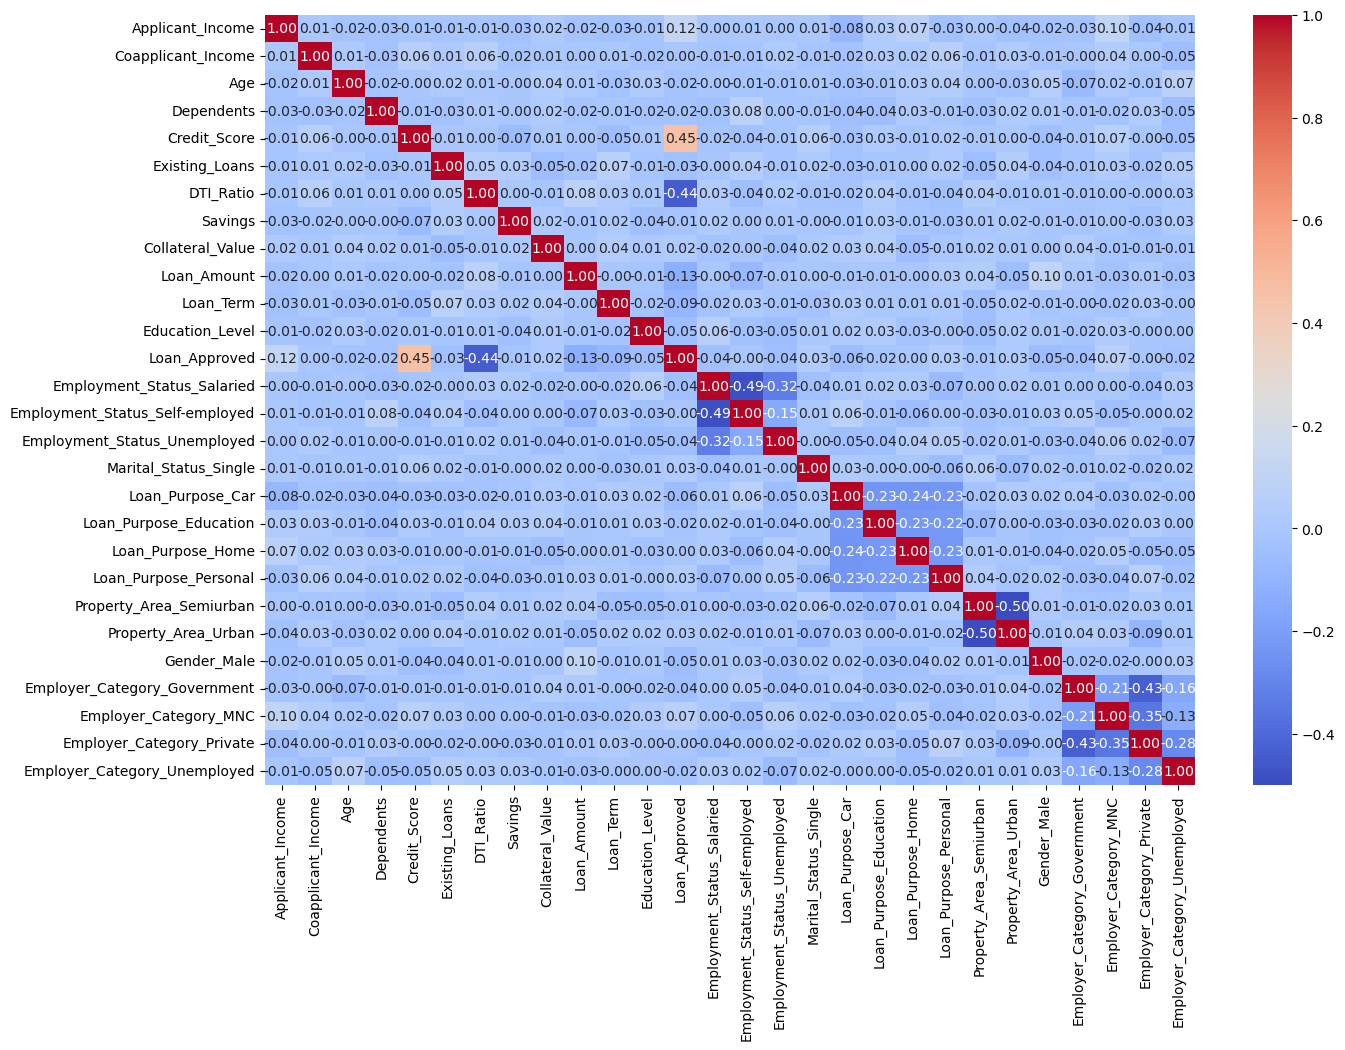

In [35]:
#Heat map In this we are comparing the loanapproved column with another numerical cols
nums_cols = df.select_dtypes(include = "number")
corr_matrix= nums_cols.corr()
plt.figure(figsize=(15,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [36]:
X = df.drop("Loan_Approved",axis = 1)
y = df["Loan_Approved"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [39]:
X_train_Scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]])

In [41]:
#Train and evalute models
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

log_model = LogisticRegression()
log_model.fit(X_train_Scaled,y_train)
y_pred = log_model.predict(X_test_Scaled)

#Evaluation
print("Logistic Regression")
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))


Logistic Regression
precision: 0.7833333333333333
recall: 0.7704918032786885
f1_score: 0.7768595041322314
Accuracy: 0.865
CM: [[126  13]
 [ 14  47]]


In [44]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_Scaled,y_train)
y_pred = knn_model.predict(X_test_Scaled)

#Evaluation
print("knn model")
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))

knn model
precision: 0.6274509803921569
recall: 0.5245901639344263
f1_score: 0.5714285714285714
Accuracy: 0.76
CM: [[120  19]
 [ 29  32]]


In [46]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_Scaled,y_train)
y_pred = nb_model.predict(X_test_Scaled)

#Evaluation
print("Naive bayes model")
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))

Naive bayes model
precision: 0.8035714285714286
recall: 0.7377049180327869
f1_score: 0.7692307692307693
Accuracy: 0.865
CM: [[128  11]
 [ 16  45]]


In [47]:
##Best model is based on precision is Naive baye's

In [ ]:
#Feature engineering to improve the model

In [56]:
#Add or transform features.
df["DTI_Ratio_sq"] = df["DTI_Ratio"] **2
df["Credit_Score_sq"] = df["Credit_Score"] **2
#df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])
X = df.drop(columns = ["Loan_Approved","DTI_Ratio","Credit_Score"])
y = df["Loan_Approved"]
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Scaling
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)


In [57]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

log_model = LogisticRegression()
log_model.fit(X_train_Scaled,y_train)
y_pred = log_model.predict(X_test_Scaled)

#Evaluation
print("Logistic Regression")
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))


Logistic Regression
precision: 0.7846153846153846
recall: 0.8360655737704918
f1_score: 0.8095238095238095
Accuracy: 0.88
CM: [[125  14]
 [ 10  51]]


In [59]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_Scaled,y_train)
y_pred = knn_model.predict(X_test_Scaled)

#Evaluation
print("knn model")
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))

knn model
precision: 0.6730769230769231
recall: 0.5737704918032787
f1_score: 0.6194690265486725
Accuracy: 0.785
CM: [[122  17]
 [ 26  35]]


In [62]:
#NaiveBayes.--->This is best fit for this laon data set
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_Scaled,y_train)
y_pred = nb_model.predict(X_test_Scaled)

#Evaluation
print("Naive bayes model")
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("CM:",confusion_matrix(y_test,y_pred))

Naive bayes model
precision: 0.8113207547169812
recall: 0.7049180327868853
f1_score: 0.7543859649122807
Accuracy: 0.86
CM: [[129  10]
 [ 18  43]]
